In [488]:
URL='https://github.com/vipetrova/SVMraninking/raw/master/COPD%20data.xlsx'
from urllib.request import urlretrieve
urlretrieve(URL, 'COPD data.xlsx')

('COPD data.xlsx', <http.client.HTTPMessage at 0x1df16672978>)

In [489]:
import os
os.chdir('C:\\Users\\vanya\\Desktop\\lab\\Thesis dissertation\\Final versions\\gittest')
os.getcwd()

'C:\\Users\\vanya\\Desktop\\lab\\Thesis dissertation\\Final versions\\gittest'

In [490]:
import pandas as pd
data = pd.read_excel("COPD data.xlsx")
data

,Primary ID,Activity increasing 1 to 3,4.11_153.0376,13.57_153.0327,12.76_153.0286,19.13_150.0115,20.24_142.9904,17.97_142.9865,16.16_142.9843,19.13_142.9809,...,18.34_1165.3911,13.46_1153.3862,11.54_1153.3785,4.65_1153.3722,4.84_1151.4021,12.43_1151.4018,15.98_1151.4006,14.29_1151.4000,15.87_1151.3741,9.57_1151.3733
0,oli_BG11_1,1,2.079551,0.000000,18.757410,12.583840,0.000000,0.000000,0.000000,31.811820,...,0.000000,0.975955,0.000000,0.000000,0.178146,0.00000,0.000000,0.00000,0.00000,1.082347
1,oli_BG11_2,1,1.675784,0.000000,16.497160,11.172750,0.000000,0.000000,10.860540,3.009283,...,0.000000,0.970939,0.870882,0.000000,0.000000,0.00000,0.105791,0.00000,0.00000,0.752318
2,oli_Lin_1,2,0.856432,25.765770,0.000000,0.000000,0.000000,2.936383,3.663038,0.000000,...,0.274373,6.642578,11.327210,4.756947,1.558672,0.00000,0.000000,0.00000,29.28206,17.033150
3,oli_Lin_2,2,1.020419,20.540220,0.000000,0.000000,0.000000,0.000000,0.241509,0.000000,...,0.000000,5.976575,10.939780,4.687953,1.548808,0.00000,0.000000,0.00000,29.01175,16.274210
4,oli_Cr_1,3,10.413300,2.101599,4.401113,0.988915,1.786108,2.371135,0.000000,0.000000,...,1.967147,0.000000,0.000000,1.004988,4.360585,12.28082,21.461600,12.96999,20.23370,1.577935
5,oli_Cr_2,3,10.472120,2.129452,4.021047,1.071116,2.996271,0.178076,0.442765,0.000000,...,2.192984,0.000000,0.151900,1.034000,4.397809,12.01187,20.383180,12.54960,0.00000,1.481075


In [459]:
data.keys()

Index(['Primary ID', 'Activity increasing 1 to 3', '4.11_153.0376',
       '13.57_153.0327', '12.76_153.0286', '19.13_150.0115', '20.24_142.9904',
       '17.97_142.9865', '16.16_142.9843', '19.13_142.9809',
       ...
       '18.34_1165.3911', '13.46_1153.3862', '11.54_1153.3785',
       '4.65_1153.3722', '4.84_1151.4021', '12.43_1151.4018',
       '15.98_1151.4006', '14.29_1151.4000', '15.87_1151.3741',
       '9.57_1151.3733'],
      dtype='object', length=649)

In [460]:
shuffled_data = data.sample(frac=1)

In [461]:
y_train = shuffled_data['Activity increasing 1 to 3']

In [462]:
x_train = shuffled_data.iloc[:,2:]

In [463]:
from sklearn.svm import SVR

In [464]:
import sklearn
sklearn.__version__

'0.19.1'

In [465]:
svr_lin = SVR(kernel='linear', C=1e3)
svr_lin_weight = SVR(kernel='linear', C=1e3)

In [466]:
weights = shuffled_data['Activity increasing 1 to 3']
weights = weights.replace(3, 100)
weights = weights.replace(2, 1)
weights = weights.replace(1, 1)

In [467]:
weights

2      1
0      1
1      1
4    100
3      1
5    100
Name: Activity increasing 1 to 3, dtype: int64

In [468]:
y_lin_weight = svr_lin.fit(x_train, y_train, sample_weight=weights).predict(x_train)

In [469]:
y_lin = svr_lin.fit(x_train, y_train).predict(x_train)
# svr_lin.fit(x, y, sample_weight=)

In [470]:
svr_lin.coef_.shape

(1, 647)

In [471]:
svr_lin.coef_

array([[  1.66704703e-05,  -1.46340711e-05,  -1.04172408e-05,
         -1.07210856e-05,   3.28747502e-06,   2.25566651e-06,
         -1.48212153e-05,  -3.37788007e-06,  -1.67959926e-06,
          6.06815364e-07,  -2.52972957e-05,   5.26607262e-06,
         -2.08091718e-05,  -3.05738133e-05,   5.05801010e-06,
         -1.41923287e-05,   5.40502540e-06,  -1.92741032e-05,
          9.15779581e-06,  -3.54997839e-07,   2.05193777e-06,
         -9.86409622e-06,   1.12669974e-06,   1.05897995e-05,
         -6.06290546e-06,  -1.03382669e-06,   4.69012158e-06,
         -1.17918069e-05,  -6.47647691e-06,  -2.51400198e-06,
         -3.74413249e-05,   3.11233639e-06,   3.11523552e-06,
          4.17162317e-05,   6.79035063e-06,  -2.92880979e-06,
         -3.87728211e-06,   1.69787432e-06,  -1.01243179e-05,
         -1.51930654e-06,   4.92283974e-06,  -1.19966887e-05,
         -4.43313896e-06,  -5.59883582e-07,   3.30411449e-06,
          4.97566070e-06,   1.05430711e-05,  -1.69842494e-05,
        

In [472]:
x_train.shape

(6, 647)

<Container object of 647 artists>

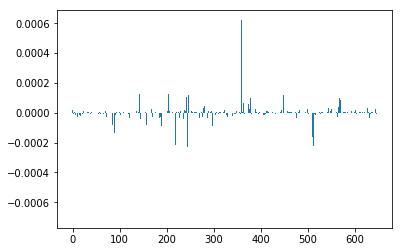

In [473]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(range(x_train.shape[1]), svr_lin.coef_.squeeze())


In [474]:
svr_lin.support_vectors_.shape

(3, 647)

<Container object of 647 artists>

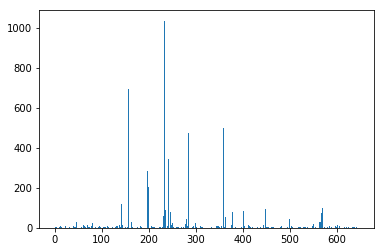

In [475]:
level3 = svr_lin.support_vectors_[2]
# change number to 1 and 0 for activity 2 and 1 respectively
level2 = svr_lin.support_vectors_[1]
level1 = svr_lin.support_vectors_[0]
fig, ax = plt.subplots()
ax.bar(range(x_train.shape[1]), level3.squeeze())


In [476]:
import numpy as np
l3id = pd.DataFrame(list(zip(data.keys()[2:],level3,
                             svr_lin.coef_.squeeze())),
                    columns = ["chem", "SVC3", "SVC_coeff"]
                   )

In [477]:
#import numpy as np
#l3id = pd.DataFrame(list(zip(data.keys()[2:],level3, 0 
#                             svr_lin.coef_.squeeze())),
#                    columns = ["chem", "SVC3", "SVC_coeff"]
#                   )

In [478]:
l3id[l3id["SVC_coeff"]>0].sort_values(by="SVC3", ascending=False)

,chem,SVC3,SVC_coeff
359,15.92_575.1661,497.371700,6.205339e-04
242,17.02_479.1191,343.954100,1.083895e-04
197,14.83_449.0902,283.681700,3.568780e-04
194,14.83_449.1257,283.571300,3.566235e-04
241,13.48_479.1228,240.438500,3.704140e-04
199,19.21_447.1408,205.672500,3.762548e-04
52,9.99_289.0956,128.278800,1.433582e-04
568,16.37_863.2813,124.506900,1.980939e-04
101,16.66_333.0946,122.868900,2.042315e-04
142,15.92_423.1184,116.812500,1.292274e-04


In [479]:
pd.DataFrame?

In [480]:
level3.shape

(647,)

In [481]:
svr_lin?

In [482]:
import sklearn
sklearn.__version__

'0.19.1'

In [483]:
l3id.to_excel("svr1_w.xlsx")